# Exploratory Data Analysis - 'DIE ZEIT' Churn Prediction

## **Table of Content**

[…]

## **1 - Introduction**

#### **Project Name**
Neuefische Capstone Project: 'DIE ZEIT' Churn Prediction

#### **Description**
The task of this data science project is it to perform a churn prediction based on the cancellations of previous years. So, basically answering the question 'Which customer is canceling his or her subscription within the next year?'. To answer this question a model should get trained with the data from previous years (greater 2012) to predict the affinity of canceling per order.

This notebook contains the exploratory data analysis to gather initial information about the processed data set and preprocess the data for the next step of modeling.

The the target variable is ```churn```.

#### **Team**
+ Kevin Tomas
+ Sebastian Rötten
+ Chandrakantha Hassan Anantharajaiah
+ Michael Leder

#### **Time Period**
**Project Start:** 23/11/2020 <br/>
**Project End:** 18/12/2020

## **2 - Environments, Imports, Settings and Functions**

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_theme(style="whitegrid")
sns.set_palette('rainbow')

In [2]:
# Define decimal places shown in the notebook
pd.options.display.float_format = '{:,.1f}'.format

# Display the whole content of the data frame
pd.set_option('display.max_columns', None)   # Displays all columns
pd.set_option('display.max_rows', None)      # Displays all rows

# Ignore warnings while plotting
import warnings
warnings.filterwarnings("ignore")

### **Functions**

In [3]:
def boxplot_1x4 (relevant, df, hue_value=0):
    """
    This function plots several box plots.
    """
    
    relevant = list([relevant])
    
    sns.color_palette('Blues_r')
    fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(20, 5), sharey=False)
    
    for i in range(0, 4):
        
        sns.boxplot(ax=axes[0], x=df_tot[relevant[0][0]], data=df, orient='h', hue=hue_value)
        sns.boxplot(ax=axes[1], x=df_tot[relevant[0][1]], data=df, orient='h', hue=hue_value)
        sns.boxplot(ax=axes[2], x=df_tot[relevant[0][2]], data=df, orient='h', hue=hue_value)
        sns.boxplot(ax=axes[3], x=df_tot[relevant[0][3]], data=df, orient='h', hue=hue_value)

In [4]:
def distplot_1x4 (relevant, df):
    """
    This function plots several box plots.
    """
    
    relevant = list([relevant])
    
    sns.color_palette('Blues_r')
    fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(20, 5), sharey=False)
    
    for i in range(0, 4):
        
        sns.distplot(ax=axes[0], x=df_tot[relevant[0][0]])
        sns.distplot(ax=axes[1], x=df_tot[relevant[0][1]])
        sns.distplot(ax=axes[2], x=df_tot[relevant[0][2]])
        sns.distplot(ax=axes[3], x=df_tot[relevant[0][3]])

In [5]:
def correlation(df):
    """
    This function plots a correlogram.
    """
    #Plot
    fig, ax = plt.subplots(figsize=(18, 14))
    mask = np.triu(df.corr())
    ax = sns.heatmap(round(df.corr(), 1),
                     annot=True,
                     mask=mask,
                     cmap="coolwarm",
                     vmax=1,
                     center=0,
                     vmin=-1)
    # Table
    return df.corr().round(2)

## **3 - Business Understanding**
### **3.1 - Data Set**

In [6]:
df = pd.read_csv('/Users/michaelleder/neuefische/capstone-ZEIT-2020-ds/00_data/f_chtr_churn_traintable_nf_clean_wo_outliers.csv', index_col=0)

In [7]:
df.head(1)

,liefer_beginn_evt,kanal,objekt_name,aboform_name,zahlung_rhythmus_name,lesedauer,rechnungsmonat,zahlung_weg_name,studentenabo,plz_1,plz_2,plz_3,ort,metropole,land_iso_code,shop_kauf,unterbrechung,anrede,titel,avg_churn,email_am_kunden,zon_che_opt_in,zon_sit_opt_in,zon_zp_grey,zon_premium,zon_boa,zon_kommentar,zon_sonstige,zon_zp_red,zon_rawr,zon_community,zon_app_sonstige,zon_schach,zon_blog_kommentare,zon_quiz,cnt_abo,cnt_abo_diezeit,cnt_abo_diezeit_digital,cnt_abo_magazin,cnt_umwandlungsstatus2_dkey,abo_registrierung_min,nl_zeitbrief,nl_zeitshop,nl_zeitverlag_hamburg,nl_fdz_organisch,nl_blacklist_sum,nl_bounced_sum,nl_aktivitaet,nl_registrierung_min,nl_sperrliste_sum,nl_opt_in_sum,boa_reg,che_reg,sit_reg,sso_reg,received_anzahl_1w,received_anzahl_1m,received_anzahl_3m,received_anzahl_6m,opened_anzahl_1w,opened_anzahl_1m,opened_anzahl_3m,openedanzahl_6m,clicked_anzahl_1w,clicked_anzahl_1m,clicked_anzahl_3m,clicked_anzahl_6m,unsubscribed_anzahl_1w,unsubscribed_anzahl_1m,unsubscribed_anzahl_3m,unsubscribed_anzahl_6m,openrate_1w,clickrate_1w,openrate_1m,clickrate_1m,openrate_3m,clickrate_3m,received_anzahl_bestandskunden_1w,received_anzahl_bestandskunden_1m,received_anzahl_bestandskunden_3m,received_anzahl_bestandskunden_6m,opened_anzahl_bestandskunden_1w,opened_anzahl_bestandskunden_1m,opened_anzahl_bestandskunden_3m,openedanzahl_bestandskunden_6m,clicked_anzahl_bestandskunden_1w,clicked_anzahl_bestandskunden_1m,clicked_anzahl_bestandskunden_3m,clicked_anzahl_bestandskunden_6m,unsubscribed_anzahl_bestandskunden_1w,unsubscribed_anzahl_bestandskunden_1m,unsubscribed_anzahl_bestandskunden_3m,unsubscribed_anzahl_bestandskunden_6m,openrate_bestandskunden_1w,clickrate_bestandskunden_1w,openrate_bestandskunden_1m,clickrate_bestandskunden_1m,openrate_bestandskunden_3m,clickrate_bestandskunden_3m,received_anzahl_produktnews_1w,received_anzahl_produktnews_1m,received_anzahl_produktnews_3m,received_anzahl_produktnews_6m,opened_anzahl_produktnews_1w,opened_anzahl_produktnews_1m,opened_anzahl_produktnews_3m,openedanzahl_produktnews_6m,clicked_anzahl_produktnews_1w,clicked_anzahl_produktnews_1m,clicked_anzahl_produktnews_3m,clicked_anzahl_produktnews_6m,unsubscribed_anzahl_produktnews_1w,unsubscribed_anzahl_produktnews_1m,unsubscribed_anzahl_produktnews_3m,unsubscribed_anzahl_produktnews_6m,openrate_produktnews_1w,clickrate_produktnews_1w,openrate_produktnews_1m,clickrate_produktnews_1m,openrate_produktnews_3m,clickrate_produktnews_3m,received_anzahl_hamburg_1w,received_anzahl_hamburg_1m,received_anzahl_hamburg_3m,received_anzahl_hamburg_6m,opened_anzahl_hamburg_1w,opened_anzahl_hamburg_1m,opened_anzahl_hamburg_3m,openedanzahl_hamburg_6m,clicked_anzahl_hamburg_1w,clicked_anzahl_hamburg_1m,clicked_anzahl_hamburg_3m,clicked_anzahl_hamburg_6m,unsubscribed_anzahl_hamburg_1w,unsubscribed_anzahl_hamburg_1m,unsubscribed_anzahl_hamburg_3m,unsubscribed_anzahl_hamburg_6m,openrate_hamburg_1w,clickrate_hamburg_1w,openrate_hamburg_1m,clickrate_hamburg_1m,openrate_hamburg_3m,clickrate_hamburg_3m,received_anzahl_zeitbrief_1w,received_anzahl_zeitbrief_1m,received_anzahl_zeitbrief_3m,received_anzahl_zeitbrief_6m,opened_anzahl_zeitbrief_1w,opened_anzahl_zeitbrief_1m,opened_anzahl_zeitbrief_3m,openedanzahl_zeitbrief_6m,clicked_anzahl_zeitbrief_1w,clicked_anzahl_zeitbrief_1m,clicked_anzahl_zeitbrief_3m,clicked_anzahl_zeitbrief_6m,unsubscribed_anzahl_zeitbrief_1w,unsubscribed_anzahl_zeitbrief_1m,unsubscribed_anzahl_zeitbrief_3m,unsubscribed_anzahl_zeitbrief_6m,openrate_zeitbrief_1w,clickrate_zeitbrief_1w,openrate_zeitbrief_1m,clickrate_zeitbrief_1m,openrate_zeitbrief_3m,clickrate_zeitbrief_3m,training_set,kuendigungs_eingangs_datum,churn,date_x
0,2013-10-02,andere,ZEIT Digital,Probeabo,jährlich,68,0,Bankeinzug,0,6,64,647,Erbach,0,DE,4,0,Frau,akademischer Titel,0.1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,0,2,2,2005-01-27 07:53:59,2,2,0,0,0,1,14,2005-09-30 00:00:00,0,0,0,0,0,1,6,14,43,80,4,15,38,74,1,2,2,2,0,0,0,0,0.7,0.2,1.1,0.1,0.9,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [8]:
print('The data set has {0} columns and {1} rows'.format(df.shape[0],df.shape[1]))

The data set has 156982 columns and 169 rows


In [9]:
# Rename inconsistent column names
df.rename({'openedanzahl_6m':'opened_anzahl_6m',
           'openedanzahl_bestandskunden_6m':'opened_anzahl_bestandskunden_6m',
           'openedanzahl_hamburg_6m': 'opened_anzahl_hamburg_6m',
           'openedanzahl_produktnews_6m': 'opened_anzahl_produktnews_6m',
           'openedanzahl_zeitbrief_6m': 'opened_anzahl_zeitbrief_6m',
          }, axis=1, inplace=True)

## **4 - Data Splitting**
Each of the team members investigates a subset of the initial data frame. Therefore, a subset of the data frame has to be selected by dropping the not relevant columns.

### **4.1 - Dropping columns**

In [10]:
# Identify index of column ranges that have to be dropped

# Defining block 1
start_ind_1 = df.columns.get_loc('zon_che_opt_in')
end_ind_1 = df.columns.get_loc('sso_reg')
# Defining block 2 
start_ind_2 = df.columns.get_loc('received_anzahl_produktnews_1w')
end_ind_2 = df.columns.get_loc('clickrate_zeitbrief_3m')

# Generate variables containing the index

cols1 = [i for i in range(start_ind_1, end_ind_1 + 1)]   # Slice 1
cols2 = [i for i in range(start_ind_2, end_ind_2 + 1)]   # Slice 2
# Convert to list type
cols1 = list(df.columns[cols1])
cols2 = list(df.columns[cols2])

# Finally drop the columns

df_c = df.drop(columns=cols1, axis=1)                    # c = customized
df_c = df_c.drop(columns=cols2, axis=1)

## **5 - Data Exploration (get an overview)**

In [11]:
df_c.head(1)

,liefer_beginn_evt,kanal,objekt_name,aboform_name,zahlung_rhythmus_name,lesedauer,rechnungsmonat,zahlung_weg_name,studentenabo,plz_1,plz_2,plz_3,ort,metropole,land_iso_code,shop_kauf,unterbrechung,anrede,titel,avg_churn,email_am_kunden,received_anzahl_1w,received_anzahl_1m,received_anzahl_3m,received_anzahl_6m,opened_anzahl_1w,opened_anzahl_1m,opened_anzahl_3m,opened_anzahl_6m,clicked_anzahl_1w,clicked_anzahl_1m,clicked_anzahl_3m,clicked_anzahl_6m,unsubscribed_anzahl_1w,unsubscribed_anzahl_1m,unsubscribed_anzahl_3m,unsubscribed_anzahl_6m,openrate_1w,clickrate_1w,openrate_1m,clickrate_1m,openrate_3m,clickrate_3m,received_anzahl_bestandskunden_1w,received_anzahl_bestandskunden_1m,received_anzahl_bestandskunden_3m,received_anzahl_bestandskunden_6m,opened_anzahl_bestandskunden_1w,opened_anzahl_bestandskunden_1m,opened_anzahl_bestandskunden_3m,opened_anzahl_bestandskunden_6m,clicked_anzahl_bestandskunden_1w,clicked_anzahl_bestandskunden_1m,clicked_anzahl_bestandskunden_3m,clicked_anzahl_bestandskunden_6m,unsubscribed_anzahl_bestandskunden_1w,unsubscribed_anzahl_bestandskunden_1m,unsubscribed_anzahl_bestandskunden_3m,unsubscribed_anzahl_bestandskunden_6m,openrate_bestandskunden_1w,clickrate_bestandskunden_1w,openrate_bestandskunden_1m,clickrate_bestandskunden_1m,openrate_bestandskunden_3m,clickrate_bestandskunden_3m,training_set,kuendigungs_eingangs_datum,churn,date_x
0,2013-10-02,andere,ZEIT Digital,Probeabo,jährlich,68,0,Bankeinzug,0,6,64,647,Erbach,0,DE,4,0,Frau,akademischer Titel,0.1,1.0,6,14,43,80,4,15,38,74,1,2,2,2,0,0,0,0,0.7,0.2,1.1,0.1,0.9,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN,0,2019-06-18 00:00:00


### **5.1 - Descriptive Statistics**

In [12]:
df_c.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
lesedauer,"156,982.0",31.8,21.5,0.0,13.0,26.0,46.0,88.0
rechnungsmonat,"156,982.0",0.1,0.3,0.0,0.0,0.0,0.0,1.0
studentenabo,"156,982.0",0.1,0.3,0.0,0.0,0.0,0.0,1.0
metropole,"156,982.0",0.3,0.5,0.0,0.0,0.0,1.0,1.0
shop_kauf,"156,982.0",0.4,2.1,0.0,0.0,0.0,0.0,152.0
unterbrechung,"156,982.0",0.1,0.3,0.0,0.0,0.0,0.0,1.0
avg_churn,"156,982.0",0.3,0.1,0.1,0.2,0.3,0.4,0.7
email_am_kunden,"156,982.0",0.9,0.3,0.0,1.0,1.0,1.0,1.0
received_anzahl_1w,"156,982.0",3.1,4.0,0.0,0.0,2.0,4.0,53.0
received_anzahl_1m,"156,982.0",12.0,15.0,0.0,0.0,6.0,16.0,203.0


### **5.2 - Data types**

In [13]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156982 entries, 0 to 209041
Data columns (total 69 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   liefer_beginn_evt                      156982 non-null  object 
 1   kanal                                  156982 non-null  object 
 2   objekt_name                            156982 non-null  object 
 3   aboform_name                           156982 non-null  object 
 4   zahlung_rhythmus_name                  156982 non-null  object 
 5   lesedauer                              156982 non-null  int64  
 6   rechnungsmonat                         156982 non-null  int64  
 7   zahlung_weg_name                       156982 non-null  object 
 8   studentenabo                           156982 non-null  int64  
 9   plz_1                                  156982 non-null  object 
 10  plz_2                                  156982 non-null  

### **5.3 - Check for NaN's**
The read in .csv-file already is already a pre-cleaned version of the data set. The inital data set contained missing values in the columns ```ort``` (85 valiues), ```email_am_kunden``` (12 values) and ```kuendigungs_eingangs_datum``` (142,754 values).

In [14]:
df_c.isnull().sum().sort_values(ascending=False)[:5]

kuendigungs_eingangs_datum    108720
date_x                             0
received_anzahl_6m                 0
titel                              0
avg_churn                          0
dtype: int64

**Note:** The missing values in the column ```kuendigungs_eingangs_datum``` are not critical as they are coming from data points where the contract has been not cancelled yet.

### **5.4 - Check for duplicates**

In [15]:
#duplicates = df_c['auftrag_new_id'].duplicated().any()
#duplicates

#auftrag_new_id --> dropped

**Note (regarding the initial data set):**
+ Based on the column ```auftrag_new_id``` **no duplicates** have been found. <br/>
+ Therefore, the column ```auftrag_new_id``` has been dropped. So, this pre-cleaned data set does not contain the column anymore.
+ **BUT** the team identified several identical rows. Within this rows the content is identical over several rows eventhough the ID is different.

[…]

## **6 - Data Splitting (CONTINUATION)**
For better handling od the data in the upcoming investigations, the data is split into smaller, thematic chunks.

In [16]:
# Created Subsets
# df_dem -->> data frame contains demographical information (dem = general)

# Define block to be dropped (Subset containing the demographical)
start_ind_1 = df_c.columns.get_loc('received_anzahl_1w')
end_ind_1 = df_c.columns.get_loc('training_set')

# Drop columns
df_dem = df_c.drop(df_c.iloc[:, start_ind_1:end_ind_1], axis=1)

# Crosscheck of the subsets
print(df_dem.columns)

Index(['liefer_beginn_evt', 'kanal', 'objekt_name', 'aboform_name',
       'zahlung_rhythmus_name', 'lesedauer', 'rechnungsmonat',
       'zahlung_weg_name', 'studentenabo', 'plz_1', 'plz_2', 'plz_3', 'ort',
       'metropole', 'land_iso_code', 'shop_kauf', 'unterbrechung', 'anrede',
       'titel', 'avg_churn', 'email_am_kunden', 'training_set',
       'kuendigungs_eingangs_datum', 'churn', 'date_x'],
      dtype='object')


In [17]:
# Created Subsets
# df_tot -->> data frame contains information about all received emails (tot = total)

# Define block to be dropped (Subset containing 'Erhalten insg ...' (engl. totally received)
start_ind_1 = df_c.columns.get_loc('liefer_beginn_evt')
end_ind_1 = df_c.columns.get_loc('received_anzahl_1w')

# Drop first set of columns
df_tot = df_c.drop(df_c.iloc[:, start_ind_1:end_ind_1], axis=1)

# Define another block to be dropped
start_ind_2 = df_tot.columns.get_loc('received_anzahl_bestandskunden_1w')
end_ind_2 = df_tot.columns.get_loc('churn')

df_tot = df_tot.drop(df_tot.iloc[:, start_ind_2:end_ind_2], axis=1)

# Drop 'date_x'
df_tot = df_tot.drop(labels='date_x', axis=1)

# Crosscheck of the subsets
print(df_tot.columns)

Index(['received_anzahl_1w', 'received_anzahl_1m', 'received_anzahl_3m',
       'received_anzahl_6m', 'opened_anzahl_1w', 'opened_anzahl_1m',
       'opened_anzahl_3m', 'opened_anzahl_6m', 'clicked_anzahl_1w',
       'clicked_anzahl_1m', 'clicked_anzahl_3m', 'clicked_anzahl_6m',
       'unsubscribed_anzahl_1w', 'unsubscribed_anzahl_1m',
       'unsubscribed_anzahl_3m', 'unsubscribed_anzahl_6m', 'openrate_1w',
       'clickrate_1w', 'openrate_1m', 'clickrate_1m', 'openrate_3m',
       'clickrate_3m', 'churn'],
      dtype='object')


In [18]:
# df_e_cust -->> data frame contains information about emails established customers received

# Define block to be deleted (Subset containing 'Erhalten aus dem Bestandskundenmandanten ...' (engl. Received from existing customer))
start_ind_1 = df_c.columns.get_loc('liefer_beginn_evt')
end_ind_1 = df_c.columns.get_loc('received_anzahl_bestandskunden_1w')

# Drop first set of columns
df_e_cust = df_c.drop(df_c.iloc[:, start_ind_1:end_ind_1], axis=1)

# Drop further columns 
df_e_cust = df_e_cust.drop(labels=['training_set', 'kuendigungs_eingangs_datum', 'date_x'], axis=1)

In [19]:
# Crosscheck of the subsets
print(df_e_cust.columns)

Index(['received_anzahl_bestandskunden_1w',
       'received_anzahl_bestandskunden_1m',
       'received_anzahl_bestandskunden_3m',
       'received_anzahl_bestandskunden_6m', 'opened_anzahl_bestandskunden_1w',
       'opened_anzahl_bestandskunden_1m', 'opened_anzahl_bestandskunden_3m',
       'opened_anzahl_bestandskunden_6m', 'clicked_anzahl_bestandskunden_1w',
       'clicked_anzahl_bestandskunden_1m', 'clicked_anzahl_bestandskunden_3m',
       'clicked_anzahl_bestandskunden_6m',
       'unsubscribed_anzahl_bestandskunden_1w',
       'unsubscribed_anzahl_bestandskunden_1m',
       'unsubscribed_anzahl_bestandskunden_3m',
       'unsubscribed_anzahl_bestandskunden_6m', 'openrate_bestandskunden_1w',
       'clickrate_bestandskunden_1w', 'openrate_bestandskunden_1m',
       'clickrate_bestandskunden_1m', 'openrate_bestandskunden_3m',
       'clickrate_bestandskunden_3m', 'churn'],
      dtype='object')


## **5 - Data Exploration (CONTINUATION)**
[...]

### **5.5 - Assumptions // Hypothesis**

1. People with a academic title build the majority of the subscribers
2. ...

### **5.6 - Demographical Data (df_dem)**
[... check work from Sebastian …]

### **5.7 - E-Mails Totally Received by ALL Customers (df_tot)**
This data frame contains information about the **total amount of emails sent to (all) customers** for different time periods.

```Column name``` | Time Period
----------------- | -----------------
received_anzahl | 1 week, 1 month, 3 months, 6 months
opened_anzahl | 1 week, 1 month, 3 months, 6 months
clicked_anzahl | 1 week, 1 month, 3 months, 6 months
unsubscribed_anzahl | 1 week, 1 month, 3 months, 6 months
openrate | 1 week, 1 month, 3 months
clickrate | 1 week, 1 month, 3 months

In [20]:
df_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156982 entries, 0 to 209041
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   received_anzahl_1w      156982 non-null  int64  
 1   received_anzahl_1m      156982 non-null  int64  
 2   received_anzahl_3m      156982 non-null  int64  
 3   received_anzahl_6m      156982 non-null  int64  
 4   opened_anzahl_1w        156982 non-null  int64  
 5   opened_anzahl_1m        156982 non-null  int64  
 6   opened_anzahl_3m        156982 non-null  int64  
 7   opened_anzahl_6m        156982 non-null  int64  
 8   clicked_anzahl_1w       156982 non-null  int64  
 9   clicked_anzahl_1m       156982 non-null  int64  
 10  clicked_anzahl_3m       156982 non-null  int64  
 11  clicked_anzahl_6m       156982 non-null  int64  
 12  unsubscribed_anzahl_1w  156982 non-null  int64  
 13  unsubscribed_anzahl_1m  156982 non-null  int64  
 14  unsubscribed_anzahl_

**Notes:**<br/>
+ **Data types:**
    + Data types are OK
    + Ints for counts
    + floats for 'calculated' rates <br/>
+ **Variable type:**
    + Numerical variables (no categories can be identified)
+ **Missing values:**
    + None

#### **Check for Outliers (for aggregated values - 6 months)**

In [21]:
df_tot.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
received_anzahl_1w,"156,982.0",3.1,4.0,0.0,0.0,2.0,4.0,53.0
received_anzahl_1m,"156,982.0",12.0,15.0,0.0,0.0,6.0,16.0,203.0
received_anzahl_3m,"156,982.0",34.4,41.7,0.0,1.0,19.0,50.0,573.0
received_anzahl_6m,"156,982.0",68.1,80.7,0.0,3.0,38.0,98.0,"1,147.0"
opened_anzahl_1w,"156,982.0",1.0,2.4,0.0,0.0,0.0,1.0,60.0
opened_anzahl_1m,"156,982.0",3.8,8.5,0.0,0.0,0.0,4.0,314.0
opened_anzahl_3m,"156,982.0",10.6,23.2,0.0,0.0,1.0,10.0,572.0
opened_anzahl_6m,"156,982.0",20.6,44.4,0.0,0.0,3.0,20.0,"1,145.0"
clicked_anzahl_1w,"156,982.0",0.1,0.5,0.0,0.0,0.0,0.0,19.0
clicked_anzahl_1m,"156,982.0",0.4,1.5,0.0,0.0,0.0,0.0,66.0


In [22]:
df_tot.received_anzahl_6m.value_counts().sort_index().tail(10)

882     1
887     1
893     1
903     1
936     1
942     1
1026    1
1069    1
1143    1
1147    1
Name: received_anzahl_6m, dtype: int64

In [23]:
df_tot.opened_anzahl_6m.value_counts().sort_index().tail(10)

664     1
665     1
700     1
713     1
793     1
800     1
898     1
1015    1
1131    1
1145    1
Name: opened_anzahl_6m, dtype: int64

In [24]:
df_tot.clicked_anzahl_6m.value_counts().sort_index().tail(10)

177    1
184    1
192    1
229    1
234    1
247    1
281    1
299    1
301    1
307    1
Name: clicked_anzahl_6m, dtype: int64

In [25]:
df_tot.unsubscribed_anzahl_6m.value_counts().sort_index()

0     149768
1       5970
2        999
3        193
4         33
5         13
6          1
7          1
8          2
11         1
13         1
Name: unsubscribed_anzahl_6m, dtype: int64

In [26]:
df_tot.clickrate_3m.value_counts().sort_index().tail(5)

1.0     1
1.1     1
1.3     1
1.5     1
2.0    15
Name: clickrate_3m, dtype: int64

In [27]:
df_tot.openrate_3m.value_counts().sort_index().tail(10)

3.0    7
3.0    1
3.1    1
3.5    2
3.7    1
4.0    1
6.0    2
7.0    2
8.0    1
9.0    1
Name: openrate_3m, dtype: int64

##### **Conclusion:**<br/>
+ The columns ```clickrate_3m``` and ```openrate_3m``` contain values > 1.0. The are considered as outliers or discrepancies, as the value for a rate cannot be greater 1.
+ A Further interpretation of the outliers based on the columns ```received_anzahl_6m```, ```opened_anzahl_6m```, ```clicked_anzahl_6m``` and ```unsubscribed_anzahl_6m```is difficult because it is not clear which newsletters have been aggregated in the columns.
+ Outliers in this columns might reduce by the applied rule how the subscription types get interpreted.

Therefore, values greater 1 get removed. Also for open- and clickrates of 1 week and 1 month.

#### **Outlier Removal**

In [28]:
df_tot_wo_outliers = df_tot.query('clickrate_3m <= 1.0 & openrate_3m <= 1.0 & openrate_1w <= 1.0 & clickrate_1w <= 1.0 & openrate_1m <= 1.0 & clickrate_1m <= 1.0')

In [29]:
print('{0} Outliers have been removed.'.format(df_tot.shape[0] - df_tot_wo_outliers.shape[0]))
print('This is {}% of the cleaned data set.'.format(round(((df_tot.shape[0]-df_tot_wo_outliers.shape[0])/df_tot.shape[0])*100, 2)))

4079 Outliers have been removed.
This is 2.6% of the cleaned data set.


In [30]:
df_tot_wo_outliers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
received_anzahl_1w,"152,903.0",3.1,4.0,0.0,0.0,2.0,4.0,53.0
received_anzahl_1m,"152,903.0",11.8,15.0,0.0,0.0,6.0,16.0,197.0
received_anzahl_3m,"152,903.0",34.0,41.5,0.0,1.0,18.0,49.0,573.0
received_anzahl_6m,"152,903.0",67.3,80.4,0.0,2.0,37.0,95.5,"1,143.0"
opened_anzahl_1w,"152,903.0",0.9,2.2,0.0,0.0,0.0,1.0,50.0
opened_anzahl_1m,"152,903.0",3.4,7.9,0.0,0.0,0.0,3.0,197.0
opened_anzahl_3m,"152,903.0",9.8,21.8,0.0,0.0,1.0,9.0,558.0
opened_anzahl_6m,"152,903.0",19.1,41.9,0.0,0.0,3.0,18.0,"1,131.0"
clicked_anzahl_1w,"152,903.0",0.1,0.5,0.0,0.0,0.0,0.0,19.0
clicked_anzahl_1m,"152,903.0",0.4,1.4,0.0,0.0,0.0,0.0,66.0


#### **Check the features by churn (for aggregated values - 6 months)**

(0.0, 10000.0)

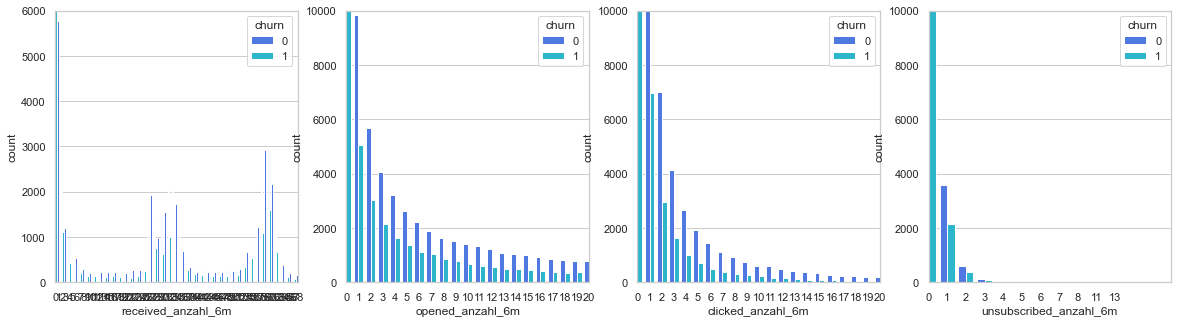

In [46]:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(20, 5), sharey=False)

sns.countplot(data=df_tot_wo_outliers, x='received_anzahl_6m', hue='churn', ax=axes[0])
axes[0].set_xlim(0, 68)
axes[0].set_ylim(0, 6000)
sns.countplot(data=df_tot_wo_outliers, x='opened_anzahl_6m', hue='churn', ax=axes[1])
axes[1].set_xlim(0, 20)
axes[1].set_ylim(0, 10000)
sns.countplot(data=df_tot_wo_outliers, x='clicked_anzahl_6m', hue='churn', ax=axes[2])
axes[2].set_xlim(0, 20)
axes[2].set_ylim(0, 10000)
sns.countplot(data=df_tot_wo_outliers, x='unsubscribed_anzahl_6m', hue='churn', ax=axes[3])
axes[3].set_xlim(0, 13)
axes[3].set_ylim(0, 10000)

(0.0, 2000.0)

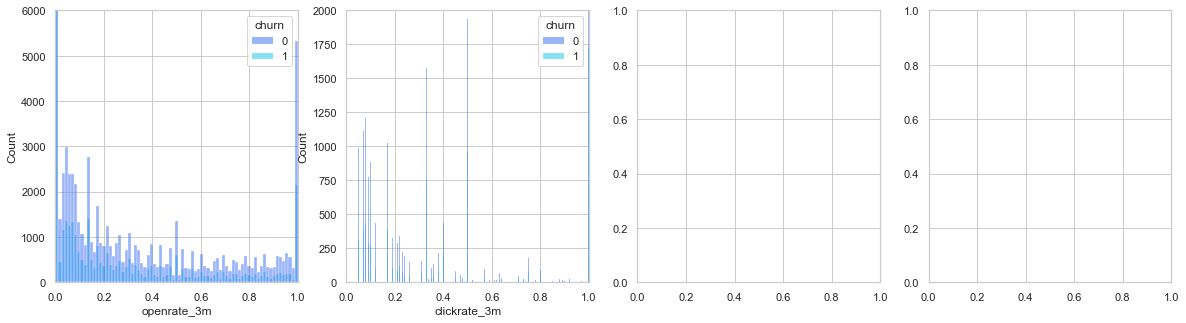

In [32]:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(20, 5), sharey=False)

sns.histplot(data=df_tot_wo_outliers, x='openrate_3m', hue='churn', ax=axes[0])
axes[0].set_xlim(0, 1.0)
axes[0].set_ylim(0, 6000)

sns.histplot(data=df_tot_wo_outliers, x='clickrate_3m', hue='churn', ax=axes[1])
plt.xlim(0, 1.0)
axes[1].set_xlim(0, 1.0)
axes[1].set_ylim(0, 2000)

[...]

#### **Check the Heat (Correlations)**

,received_anzahl_1w,received_anzahl_1m,received_anzahl_3m,received_anzahl_6m,opened_anzahl_1w,opened_anzahl_1m,opened_anzahl_3m,opened_anzahl_6m,clicked_anzahl_1w,clicked_anzahl_1m,clicked_anzahl_3m,clicked_anzahl_6m,unsubscribed_anzahl_1w,unsubscribed_anzahl_1m,unsubscribed_anzahl_3m,unsubscribed_anzahl_6m,openrate_1w,clickrate_1w,openrate_1m,clickrate_1m,openrate_3m,clickrate_3m,churn
received_anzahl_1w,1.0,1.0,1.0,0.9,0.6,0.6,0.6,0.6,0.3,0.3,0.3,0.3,-0.0,-0.0,-0.0,-0.0,0.2,0.1,0.2,0.1,0.2,0.1,-0.1
received_anzahl_1m,1.0,1.0,1.0,1.0,0.6,0.6,0.6,0.6,0.3,0.3,0.3,0.3,0.0,0.0,-0.0,-0.0,0.2,0.1,0.2,0.1,0.2,0.1,-0.1
received_anzahl_3m,1.0,1.0,1.0,1.0,0.6,0.6,0.6,0.6,0.2,0.3,0.3,0.3,0.0,0.0,0.0,-0.0,0.2,0.1,0.2,0.1,0.2,0.1,-0.1
received_anzahl_6m,0.9,1.0,1.0,1.0,0.6,0.6,0.6,0.6,0.2,0.3,0.3,0.3,0.0,0.0,0.0,0.0,0.2,0.1,0.2,0.1,0.1,0.1,-0.1
opened_anzahl_1w,0.6,0.6,0.6,0.6,1.0,0.9,0.9,0.9,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.6,0.2,0.6,0.1,0.5,0.0,-0.1
opened_anzahl_1m,0.6,0.6,0.6,0.6,0.9,1.0,1.0,0.9,0.4,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.6,0.1,0.6,0.1,0.6,0.0,-0.1
opened_anzahl_3m,0.6,0.6,0.6,0.6,0.9,1.0,1.0,1.0,0.4,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.6,0.1,0.6,0.1,0.6,0.0,-0.1
opened_anzahl_6m,0.6,0.6,0.6,0.6,0.9,0.9,1.0,1.0,0.4,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.5,0.1,0.6,0.1,0.6,0.0,-0.1
clicked_anzahl_1w,0.3,0.3,0.2,0.2,0.5,0.4,0.4,0.4,1.0,0.8,0.7,0.7,0.1,0.1,0.0,0.0,0.3,0.7,0.3,0.4,0.2,0.3,-0.0
clicked_anzahl_1m,0.3,0.3,0.3,0.3,0.5,0.5,0.5,0.5,0.8,1.0,0.9,0.9,0.1,0.1,0.0,0.0,0.3,0.4,0.3,0.5,0.3,0.3,-0.1


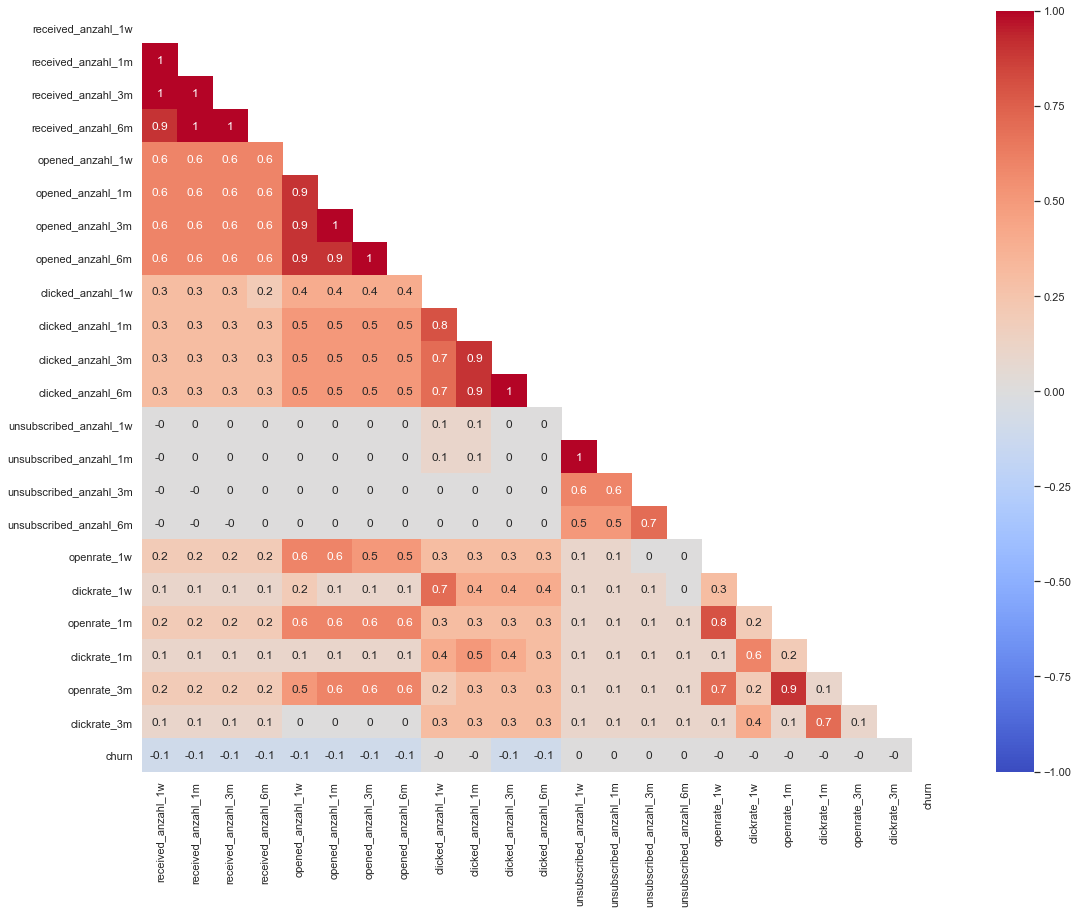

In [33]:
correlation (df_tot_wo_outliers)

**Notes:**
+ As expected the variables and their time relation correlate in groups (they are not independet).
+ e.g. received_anzahl and opened_anzahl etc.

#### **Check for Qualitative Relations (between aggregated values in 6 months and the other newsletters)**

In [34]:
# Overview
'received_anzahl_6m',
'received_anzahl_bestandskunden_6m',
'received_anzahl_hamburg_6m',
'received_anzahl_produktnews_6m',
'received_anzahl_zeitbrief_6m',

'opened_anzahl_6m',
'opened_anzahl_bestandskunden_6m',
'opened_anzahl_hamburg_6m',
'opened_anzahl_produktnews_6m',
'opened_anzahl_zeitbrief_6m',

'clicked_anzahl_6m',
'clicked_anzahl_bestandskunden_6m',
'clicked_anzahl_hamburg_6m',
'clicked_anzahl_produktnews_6m',
'clicked_anzahl_zeitbrief_6m',

'unsubscribed_anzahl_6m',
'unsubscribed_anzahl_bestandskunden_6m',
'unsubscribed_anzahl_hamburg_6m',
'unsubscribed_anzahl_produktnews_6m',
'unsubscribed_anzahl_zeitbrief_6m',

# Check aggregations
received_anzahl = sum(df.received_anzahl_6m) == sum(df.received_anzahl_bestandskunden_6m + df.received_anzahl_hamburg_6m + df.received_anzahl_produktnews_6m + df.received_anzahl_zeitbrief_6m)
opened_anzahl = sum(df.opened_anzahl_6m) == sum(df.opened_anzahl_bestandskunden_6m + df.opened_anzahl_hamburg_6m + df.opened_anzahl_produktnews_6m + df.opened_anzahl_zeitbrief_6m)
unsubscribed_anzahl = sum(df.unsubscribed_anzahl_6m) == sum(df.unsubscribed_anzahl_6m + df.unsubscribed_anzahl_bestandskunden_6m + df.unsubscribed_anzahl_hamburg_6m + df.unsubscribed_anzahl_produktnews_6m + df.unsubscribed_anzahl_zeitbrief_6m)
clicked_anzahl = sum(df.clicked_anzahl_6m) == sum(df.clicked_anzahl_6m + df.clicked_anzahl_bestandskunden_6m + df.clicked_anzahl_hamburg_6m + df.clicked_anzahl_produktnews_6m + df.clicked_anzahl_zeitbrief_6m)

print('Result for received_anzahl: {0}'.format(received_anzahl))
print('Result for opened_anzahl: {0}'.format(opened_anzahl))
print('Result for unsubscribed_anzahl: {0}'.format(unsubscribed_anzahl))
print('Result for clicked_anzahl: {0}'.format(clicked_anzahl))
print('#######################################################')

received_anzahl_all = sum(df.received_anzahl_6m)
received_anzahl_newsletter = sum(df.received_anzahl_bestandskunden_6m + df.received_anzahl_hamburg_6m + df.received_anzahl_produktnews_6m + df.received_anzahl_zeitbrief_6m)

print('Result for received_anzahl_6m_All: {0}'.format(received_anzahl_all))
print('Result for received_anzahl_6m_Newsletter: {0}'.format(received_anzahl_newsletter))
print('Result as ratio {0}'.format((received_anzahl_newsletter/received_anzahl_all)))

Result for received_anzahl: False
Result for opened_anzahl: False
Result for unsubscribed_anzahl: False
Result for clicked_anzahl: False
#######################################################
Result for received_anzahl_6m_All: 10687535
Result for received_anzahl_6m_Newsletter: 2756548
Result as ratio 0.25792177522693494


**Conclusion:**<br/>
+ The previous analysis is looking at the aggregated values for newsletters the customers received in the past 6 months.
+ The column ```received_anzahl``` has been interpreted as the total amount of newsletters a customer received.
+ As the calculated sum for ```received_anzahl_6m_All``` does not match the sum for ```received_anzahl_6m_Newsletter```, we assume that total amount of received newsletters (```received_anzahl_6m```) does also contains counts of newsletters which are not given in the data set.

### **5.8 - E-Mails Received by ESTABLISHED Customers (df_e_cust)**
This data frame contains information about the **amount of emails sent to established customers** within different time periods.

```Column name``` | Time Period
----------------- | -----------------
received_anzahl_bestandskunden | 1 week, 1 month, 3 months, 6 months
opened_anzahl_bestandskunden | 1 week, 1 month, 3 months, 6 months
clicked_anzahl_bestandskunden | 1 week, 1 month, 3 months, 6 months
unsubscribed_anzahl_bestandskunden | 1 week, 1 month, 3 months, 6 months
openrate_bestandskunden | 1 week, 1 month, 3 months
clickrate_bestandskunden | 1 week, 1 month, 3 months

In [35]:
df_e_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156982 entries, 0 to 209041
Data columns (total 23 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   received_anzahl_bestandskunden_1w      156982 non-null  int64  
 1   received_anzahl_bestandskunden_1m      156982 non-null  int64  
 2   received_anzahl_bestandskunden_3m      156982 non-null  int64  
 3   received_anzahl_bestandskunden_6m      156982 non-null  int64  
 4   opened_anzahl_bestandskunden_1w        156982 non-null  int64  
 5   opened_anzahl_bestandskunden_1m        156982 non-null  int64  
 6   opened_anzahl_bestandskunden_3m        156982 non-null  int64  
 7   opened_anzahl_bestandskunden_6m        156982 non-null  int64  
 8   clicked_anzahl_bestandskunden_1w       156982 non-null  int64  
 9   clicked_anzahl_bestandskunden_1m       156982 non-null  int64  
 10  clicked_anzahl_bestandskunden_3m       156982 non-null  

**Notes:**<br/>
+ **Data types:**
    + Data types are OK
    + Ints for counts
    + floats for 'calculated' rates <br/>
+ **Variable type:**
    + Numerical variables (no categories can be identified)
+ **Missing values:**
    + None

#### **Check for Outliers (for aggregated values - 6 months)**

In [36]:
df_e_cust.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
received_anzahl_bestandskunden_1w,"156,982.0",0.0,0.2,0.0,0.0,0.0,0.0,2.0
received_anzahl_bestandskunden_1m,"156,982.0",0.2,0.4,0.0,0.0,0.0,0.0,4.0
received_anzahl_bestandskunden_3m,"156,982.0",0.3,0.8,0.0,0.0,0.0,0.0,12.0
received_anzahl_bestandskunden_6m,"156,982.0",0.4,1.0,0.0,0.0,0.0,0.0,16.0
opened_anzahl_bestandskunden_1w,"156,982.0",0.0,0.1,0.0,0.0,0.0,0.0,1.0
opened_anzahl_bestandskunden_1m,"156,982.0",0.1,0.2,0.0,0.0,0.0,0.0,4.0
opened_anzahl_bestandskunden_3m,"156,982.0",0.1,0.5,0.0,0.0,0.0,0.0,8.0
opened_anzahl_bestandskunden_6m,"156,982.0",0.1,0.5,0.0,0.0,0.0,0.0,8.0
clicked_anzahl_bestandskunden_1w,"156,982.0",0.0,0.0,0.0,0.0,0.0,0.0,1.0
clicked_anzahl_bestandskunden_1m,"156,982.0",0.0,0.1,0.0,0.0,0.0,0.0,2.0


In [37]:
df_e_cust.received_anzahl_bestandskunden_6m.value_counts().sort_index().tail(100)

0     131759
1       8284
2       6706
3       6157
4       3408
5        659
6          1
16         8
Name: received_anzahl_bestandskunden_6m, dtype: int64

In [38]:
df_e_cust.opened_anzahl_bestandskunden_6m.value_counts().sort_index().tail(100)

0    143866
1      7299
2      3315
3      1774
4       641
5        79
8         8
Name: opened_anzahl_bestandskunden_6m, dtype: int64

In [39]:
df_e_cust.clicked_anzahl_bestandskunden_6m.value_counts().sort_index().tail(100)

0    154967
1      1885
2       124
3         5
4         1
Name: clicked_anzahl_bestandskunden_6m, dtype: int64

In [40]:
df_e_cust.unsubscribed_anzahl_bestandskunden_6m.value_counts().sort_index().tail(100)

0    156735
1       247
Name: unsubscribed_anzahl_bestandskunden_6m, dtype: int64

In [41]:
df_e_cust.openrate_bestandskunden_3m.value_counts().sort_index().tail(100)

0.0    144190
0.3      2318
0.5      2110
0.7      1656
1.0      6687
1.3         9
1.5        11
2.0         1
Name: openrate_bestandskunden_3m, dtype: int64

In [42]:
df_e_cust.clickrate_bestandskunden_3m.value_counts().sort_index().tail(100)

0.0    155089
0.2         4
0.3       361
0.5       517
0.7        58
1.0       953
Name: clickrate_bestandskunden_3m, dtype: int64

##### **Conclusion:**<br/>
+ The column ```openrate_bestandskunden_3m``` contains values >1.0. They are considered as outliers or discrepancies in the data set, as the value for a rate cannot be greater 1.

Therefore, values greater 1 get removed. Also for open- and clickrates of 1 week and 1 month.

#### **Outlier Removal**

In [43]:
df_e_cust_wo_outliers = df_e_cust.query('openrate_bestandskunden_3m <= 1.0 & clickrate_bestandskunden_3m <= 1.0 & openrate_bestandskunden_1w <= 1.0 & clickrate_bestandskunden_1w <= 1.0 & openrate_bestandskunden_1m <= 1.0 & clickrate_bestandskunden_1m <= 1.0')

In [44]:
print('{0} Outliers have been removed.'.format(df_e_cust.shape[0] - df_e_cust_wo_outliers.shape[0]))
print('This is {}% of the cleaned data set.'.format(round(((df_e_cust.shape[0]-df_e_cust_wo_outliers.shape[0])/df_tot.shape[0])*100, 2)))

97 Outliers have been removed.
This is 0.06% of the cleaned data set.


In [45]:
df_e_cust_wo_outliers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
received_anzahl_bestandskunden_1w,"156,885.0",0.0,0.2,0.0,0.0,0.0,0.0,2.0
received_anzahl_bestandskunden_1m,"156,885.0",0.2,0.4,0.0,0.0,0.0,0.0,4.0
received_anzahl_bestandskunden_3m,"156,885.0",0.3,0.8,0.0,0.0,0.0,0.0,12.0
received_anzahl_bestandskunden_6m,"156,885.0",0.4,1.0,0.0,0.0,0.0,0.0,16.0
opened_anzahl_bestandskunden_1w,"156,885.0",0.0,0.1,0.0,0.0,0.0,0.0,1.0
opened_anzahl_bestandskunden_1m,"156,885.0",0.1,0.2,0.0,0.0,0.0,0.0,4.0
opened_anzahl_bestandskunden_3m,"156,885.0",0.1,0.5,0.0,0.0,0.0,0.0,8.0
opened_anzahl_bestandskunden_6m,"156,885.0",0.1,0.5,0.0,0.0,0.0,0.0,8.0
clicked_anzahl_bestandskunden_1w,"156,885.0",0.0,0.0,0.0,0.0,0.0,0.0,1.0
clicked_anzahl_bestandskunden_1m,"156,885.0",0.0,0.1,0.0,0.0,0.0,0.0,2.0


#### **Check the features by churn (for aggregated values - 6 months)**

(0.0, 10000.0)

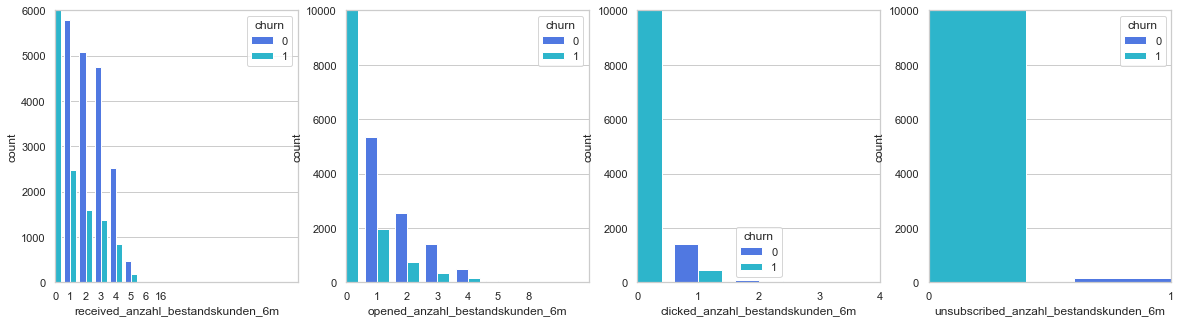

In [49]:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(20, 5), sharey=False)

sns.countplot(data=df_e_cust_wo_outliers, x='received_anzahl_bestandskunden_6m', hue='churn', ax=axes[0])
axes[0].set_xlim(0, 16)
axes[0].set_ylim(0, 6000)
sns.countplot(data=df_e_cust_wo_outliers, x='opened_anzahl_bestandskunden_6m', hue='churn', ax=axes[1])
axes[1].set_xlim(0, 8)
axes[1].set_ylim(0, 10000)
sns.countplot(data=df_e_cust_wo_outliers, x='clicked_anzahl_bestandskunden_6m', hue='churn', ax=axes[2])
axes[2].set_xlim(0, 4)
axes[2].set_ylim(0, 10000)
sns.countplot(data=df_e_cust_wo_outliers, x='unsubscribed_anzahl_bestandskunden_6m', hue='churn', ax=axes[3])
axes[3].set_xlim(0, 1)
axes[3].set_ylim(0, 10000)

(0.0, 5000.0)

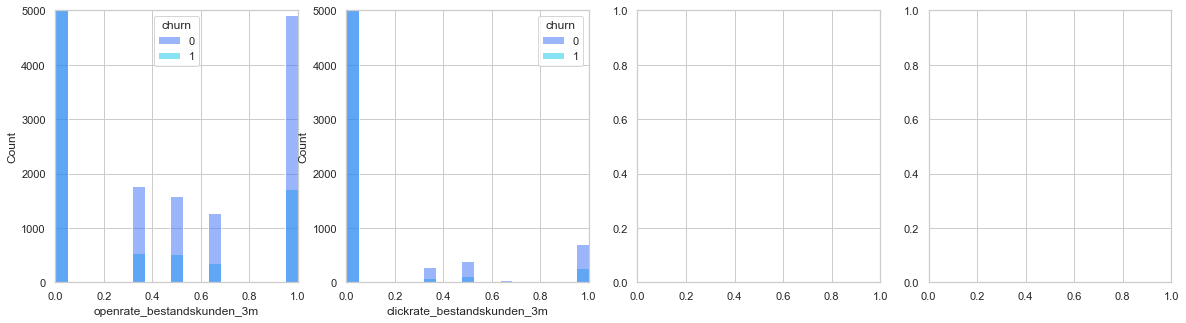

In [51]:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(20, 5), sharey=False)

sns.histplot(data=df_e_cust_wo_outliers, x='openrate_bestandskunden_3m', hue='churn', ax=axes[0])
axes[0].set_xlim(0, 1.0)
axes[0].set_ylim(0, 5000)

sns.histplot(data=df_e_cust_wo_outliers, x='clickrate_bestandskunden_3m', hue='churn', ax=axes[1])
plt.xlim(0, 1.0)
axes[1].set_xlim(0, 1.0)
axes[1].set_ylim(0, 5000)

#### **Check the Heat (Correlations)**

,received_anzahl_bestandskunden_1w,received_anzahl_bestandskunden_1m,received_anzahl_bestandskunden_3m,received_anzahl_bestandskunden_6m,opened_anzahl_bestandskunden_1w,opened_anzahl_bestandskunden_1m,opened_anzahl_bestandskunden_3m,opened_anzahl_bestandskunden_6m,clicked_anzahl_bestandskunden_1w,clicked_anzahl_bestandskunden_1m,clicked_anzahl_bestandskunden_3m,clicked_anzahl_bestandskunden_6m,unsubscribed_anzahl_bestandskunden_1w,unsubscribed_anzahl_bestandskunden_1m,unsubscribed_anzahl_bestandskunden_3m,unsubscribed_anzahl_bestandskunden_6m,openrate_bestandskunden_1w,clickrate_bestandskunden_1w,openrate_bestandskunden_1m,clickrate_bestandskunden_1m,openrate_bestandskunden_3m,clickrate_bestandskunden_3m
received_anzahl_bestandskunden_1w,1.0,0.6,0.5,0.5,0.6,0.3,0.3,0.3,0.2,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.6,0.2,0.3,0.1,0.3,0.1
received_anzahl_bestandskunden_1m,0.6,1.0,0.9,0.9,0.3,0.6,0.6,0.6,0.1,0.2,0.2,0.2,0.1,0.1,0.0,0.0,0.3,0.1,0.6,0.2,0.6,0.2
received_anzahl_bestandskunden_3m,0.5,0.9,1.0,1.0,0.3,0.6,0.7,0.7,0.1,0.2,0.3,0.3,0.1,0.1,0.1,0.1,0.3,0.1,0.6,0.2,0.6,0.2
received_anzahl_bestandskunden_6m,0.5,0.9,1.0,1.0,0.3,0.5,0.7,0.7,0.1,0.2,0.3,0.3,0.1,0.1,0.1,0.1,0.3,0.1,0.5,0.2,0.6,0.2
opened_anzahl_bestandskunden_1w,0.6,0.3,0.3,0.3,1.0,0.6,0.5,0.5,0.3,0.2,0.2,0.2,0.1,0.1,0.0,0.0,1.0,0.3,0.6,0.2,0.5,0.1
opened_anzahl_bestandskunden_1m,0.3,0.6,0.6,0.5,0.6,1.0,0.8,0.8,0.2,0.3,0.3,0.3,0.1,0.1,0.1,0.1,0.6,0.2,1.0,0.3,0.9,0.3
opened_anzahl_bestandskunden_3m,0.3,0.6,0.7,0.7,0.5,0.8,1.0,1.0,0.1,0.3,0.4,0.4,0.1,0.1,0.1,0.1,0.5,0.1,0.8,0.2,0.9,0.3
opened_anzahl_bestandskunden_6m,0.3,0.6,0.7,0.7,0.5,0.8,1.0,1.0,0.1,0.2,0.4,0.4,0.1,0.1,0.1,0.1,0.5,0.1,0.8,0.2,0.9,0.3
clicked_anzahl_bestandskunden_1w,0.2,0.1,0.1,0.1,0.3,0.2,0.1,0.1,1.0,0.6,0.4,0.4,0.1,0.1,0.0,0.0,0.3,1.0,0.2,0.5,0.1,0.4
clicked_anzahl_bestandskunden_1m,0.1,0.2,0.2,0.2,0.2,0.3,0.3,0.2,0.6,1.0,0.7,0.7,0.1,0.1,0.1,0.1,0.2,0.5,0.3,1.0,0.2,0.7


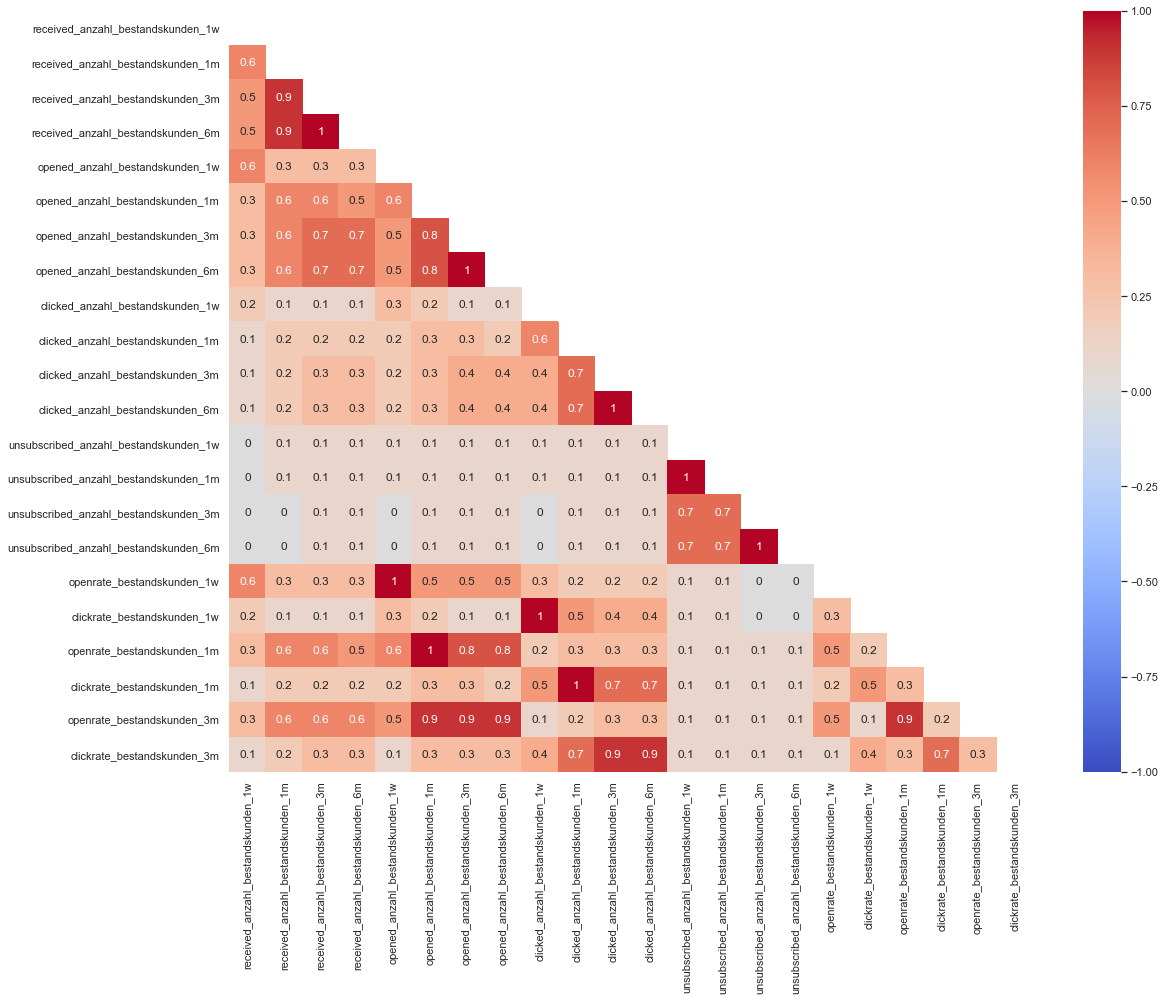

In [164]:
correlation (df_e_cust_wo_outliers)

**Notes:**
+ As expected the variables and their time relation correlate in groups (they are not independet).
+ e.g. received_anzahl_bestandskunden and opened_anzahl_bestandskunden etc.

## **Questions**
1. Waht is the difference between all customers and established customers?
2. ...

## **Code Chunks**

### OLD

##### **```received_anzahl```**

# Selecting columns with #received_anzahl#
relevant = 'received_anzahl_6m', 'opened_anzahl_6m', 'clicked_anzahl_6m', 'unsubscribed_anzahl_6m','

boxplot_1x4(relevant=relevant, df=df_tot_wo_outliers)
distplot_1x4(relevant=relevant, df=df_tot_wo_outliers)

##### **```opened_anzahl```**

# Selecting columns with #opened_anzahl#
relevant = df_tot.columns[4:8]  

boxplot_1x4(relevant=relevant, df=df_tot_wo_outliers)
distplot_1x4(relevant=relevant, df=df_tot_wo_outliers)

##### **```clicked_anzahl```**

# Selecting columns with #clicked_anzahl#
relevant = df_tot.columns[8:12]  

boxplot_1x4(relevant=relevant, df=df_tot_wo_outliers)
distplot_1x4(relevant=relevant, df=df_tot_wo_outliers)

##### **```unsubscribed_anzahl```**

# Selecting columns with #unsubscribed_anzahl#
relevant = df_tot.columns[12:16]  

boxplot_1x4(relevant=relevant, df=df_tot_wo_outliers)
distplot_1x4(relevant=relevant, df=df_tot_wo_outliers)

##### **```clickrate```**
[...]